In [120]:
# https://towardsdatascience.com/pandas-groupby-a-simple-but-detailed-tutorial-314b8f37005d
# https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d
# https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py
# https://datascientyst.com/list-aggregation-functions-aggfunc-groupby-pandas/
# https://stackoverflow.com/questions/25929319/how-to-iterate-over-pandas-multiindex-dataframe-using-index

In [121]:
import sys
import pandas as pd
sys.path.append("C:/Users/ping/MyDrive/py_files/python/py379/")
from myUtils import pickle_load, pickle_dump
pd.set_option('max_colwidth', 12, 'display.max_columns', 18, 'display.width', 1200, 'display.max_rows', 100)
INPUT_DIR = 'C:/Users/ping/OneDrive/Documents/jenn_bb_sales'
path_pickle_dump = f'{INPUT_DIR}/'

In [122]:
df = pickle_load(path_pickle_dump, 'df_item_sale_n_weather_cleaned')
rows_org, cols_org = df.shape[0], df.shape[1]
print(f'df.shape: {df.shape}, rows: {rows_org}, columns: {cols_org}')
print(f'df.columns: {df.columns}')

df.shape: (18364, 23), rows: 18364, columns: 23
df.columns: Index(['Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT08', 'DOW'], dtype='object')


In [123]:
df = df[df['Event Type'] != 'Refund']
df = df[df['Qty'] >= 0]
df = df.sort_values(['Date', 'Time'])
_rows_dropped, _cols_dropped = (rows_org - df.shape[0]), (cols_org - df.shape[1])
print(f'df.shape: {df.shape}, rows dropped from original: {_rows_dropped}, columns dropped from original: {_cols_dropped}')

df.shape: (18337, 23), rows dropped from original: 27, columns dropped from original: 0


In [138]:
ls_Date = df.Date.to_list()
Date_first, Date_last = ls_Date[0], ls_Date[-1]
print(f'first date: {Date_first}, last date: {Date_last}')
date_str = f' ({Date_first} to {Date_last})'
print(f'date_str: {date_str}')

first date: 2021-07-08, last date: 2022-09-04
date_str:  (2021-07-08 to 2022-09-04)


In [124]:
l_object, l_float, l_int64, l_error = [], [], [], []
for column in df.columns:
  if df[column].dtype == 'object':
    l_object.append(column)
  elif df[column].dtype == 'float':
    l_float.append(column)  
  elif df[column].dtype == 'int64':
    l_int64.append(column)
  else:   
    l_error.append(column)
print(f'columns with dtypes are object:\n{l_object}')
print(f'columns with dtypes are float:\n{l_float}')
print(f'columns with dtypes are int64:\n{l_int64}')
print(f'columns with dtypes are non of the above:\n{l_error}')

columns with dtypes are object:
['Date', 'Time', 'Category', 'Item', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME']
columns with dtypes are float:
['Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'AWND', 'PRCP', 'TAVG', 'WT01', 'WT02', 'WT08']
columns with dtypes are int64:
['TMAX', 'TMIN', 'DOW']
columns with dtypes are non of the above:
[]


In [125]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
pd.set_option('max_colwidth', 30)
_figsize = (4,3)  # (width, height)
_fontsize = 6
_titlescale = 1.1  # scale title text
_grid = False  # default False
# _scale = 1

day-of-week   days   total sales   avg. sales
Sun             41        33,628          820
Mon              7         1,935          276
Tue              4           717          179
Wed              6           796          133
Thu             21         4,500          214
Fri             54        36,616          678
Sat             53        55,169        1,041


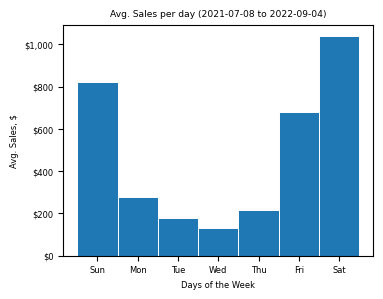

In [139]:
# Bar Graph, Avg. Gross Sales per day
_df = df.groupby(['DOW', 'Date']).agg('sum')
_l_day_of_week, _l_avg_gross_sales_per_day = [], []
_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
print(f'day-of-week   days   total sales   avg. sales')
for DOW, _df_new in _df.groupby(level=0):
  _n_days = len(_df_new)
  _sum_gross_sales = _df_new['Gross Sales'].sum()
  _avg_gross_sales = _sum_gross_sales / _n_days
  # print(f'Day of Week: {DOW},   Avg Gross Sales per day: {_avg_gross_sales:>6,.0f}')
  _l_day_of_week.append(DOW)
  _l_avg_gross_sales_per_day.append(_avg_gross_sales)
  print(f'{_dict_DOW[DOW]:<11}{_n_days:>7}{_sum_gross_sales:>14,.0f}{_avg_gross_sales:>13,.0f}')

_xlabel = 'Days of the Week'
_ylabel = 'Avg. Sales' + ', $'
_title = 'Avg. Sales per day' + date_str

# data
x = _l_day_of_week
y = _l_avg_gross_sales_per_day
# y = list(np.concatenate(y).flat)  # [33628.5, 1935.0, 717.0, 795.5, 4500.0, 36615.5, 55169.0]

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
# plt.rcParams["figure.figsize"] = [_scale * i for i in plt.rcParams["figure.figsize"]]
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat

plt.grid(_grid)
plt.show()

day-of-week   total sales
Sun                33,628
Mon                 1,935
Tue                   717
Wed                   796
Thu                 4,500
Fri                36,616
Sat                55,169


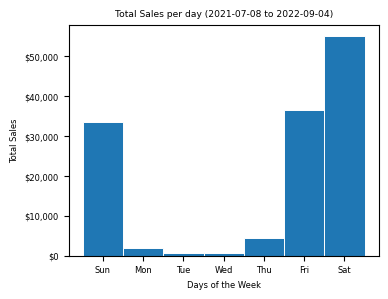

In [159]:
# Bar Graph, Gross Sales by days-of_week
_groupby_col, _agg_col = 'DOW', 'Gross Sales'
_agg_func = 'sum'
_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

_xlabel = 'Days of the Week'
_ylabel = 'Total Sales'
_title = 'Total Sales per day' + date_str

# data
x = _df.index
y = _df[_agg_col].values  # array([[33628.5], [ 1935. ], ..., [55169. ]])
y = list(np.concatenate(y).flat)  # [33628.5, 1935.0, 717.0, 795.5, 4500.0, 36615.5, 55169.0]

_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
print(f'day-of-week   total sales')
for i in x:
  print(f'{_dict_DOW[i]:<14}{y[i]:>11,.0f}')

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
# plt.rcParams["figure.figsize"] = [_scale * i for i in plt.rcParams["figure.figsize"]]
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat

plt.grid(_grid)
plt.show()

Total Sales:                   133,360
Total Transaction:               6,826
Avg. Sales per Transaction:      19.54


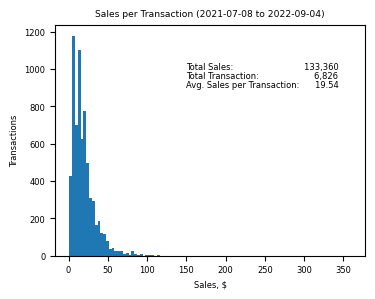

In [158]:
# Histogram, Gross Sales per Transaction
_groupby_col, _agg_col = 'Transaction ID', 'Gross Sales'
_agg_func = 'sum'

_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

Total_Gross_Sales = _df['Gross Sales'].sum()[0]  # get the first element in series
Total_Trans = len(_df)
Total_Trans
Avg_Sales_per_Trans = Total_Gross_Sales / Total_Trans
print(f'Total Sales:                {Total_Gross_Sales:>10,.0f}')
print(f'Total Transaction:          {Total_Trans:>10,}')
print(f'Avg. Sales per Transaction: {Avg_Sales_per_Trans:>10,.2f}')

_x = _df[_agg_col]
_bins = 100
_xlabel = 'Sales, $'
_ylabel = 'Transactions'
_title = 'Sales per Transaction' + date_str
_density = False  # False => count, True => Area = 1 
n, bins, patches = plt.hist(_x, _bins, density=_density)
plt.rcParams.update({'font.size': _fontsize})
plt.rcParams["figure.figsize"] = _figsize
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.text(150, 1000, r'Total Sales:                           133,360')
plt.text(150, 950,  r'Total Transaction:                     6,826')
plt.text(150, 900,  r'Avg. Sales per Transaction:      19.54')
# plt.xlim(0, 20)
# plt.ylim(0, 1250)

plt.grid(_grid)
plt.show()

In [171]:
_df = df.sort_values(by=['Time', 'Date'])
_df.Time = pd.to_datetime(_df.Time)
_df.groupby([_df['Time'].dt.hour])['Gross Sales'].sum()
# _df.groupby([_df['Time'].dt.hour])['Gross Sales'].count()
# _df1 = _df.groupby([_df['Time'].dt.hour])['Gross Sales']
# _df

Time
0       172.0
1        45.0
5        32.0
6       116.0
7       102.0
8      1005.0
9     54635.0
10    37922.0
11    21482.5
12    10805.0
13     2105.0
14      421.0
15      337.0
16      263.0
17      493.0
18      381.0
19      710.0
20      566.0
21      772.0
22      839.0
23      157.0
Name: Gross Sales, dtype: float64